In [1]:
import numpy as np
import seaborn as sns

In [2]:
init_state = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
])

In [3]:
class Game:
    def __init__(self, state):
        self.state = state
        self.empty = self.make_empty(state)
        
    def make_empty(self, state):
        emp = []
        for i in range(3):
            for j in range(3):
                if state[i][j] == 0:
                    emp.append(3*i + j)
        
        return emp
    
    def is_lose(self, a):
        opp = 2 - (a-1)
        
        for i in range(3):
            if self.state[i][0] == self.state[i][1] == self.state[i][2] == opp:
                return 1
            elif self.state[0][i] == self.state[1][i] == self.state[2][i] == opp:
                return 1
        if self.state[0][0] == self.state[1][1] == self.state[2][2] == opp:
            return 1
        return 0
    
    def is_win(self, a):       
        for i in range(3):
            if self.state[i][0] == self.state[i][1] == self.state[i][2] == a:
                return 1
            elif self.state[0][i] == self.state[1][i] == self.state[2][i] == a:
                return 1
        if self.state[0][0] == self.state[1][1] == self.state[2][2] == a:
            return 1
        if self.state[0][2] == self.state[1][1] == self.state[2][0] == a:
            return 1
        return 0
    
    def is_draw(self, a):
        if self.is_win(a):
            return 0
        if np.all(self.state):
            return 1
        else:
            return 0
        
    def is_done(self):
        if self.is_win(1) or self.is_win(2) or self.is_draw(a):
            return 1
        else:
            return 0
        
        
    def update(self, target, a):
        state = self.state.copy()
        x, y = target//3, target%3
        state[x][y] = a
        return Game(state)

In [4]:
class Random:
    def __init__(self, status):
        self.status = status

    def action(self, game):
        return np.random.choice(game.empty)

In [5]:
class MinMax:
    def __init__(self, status):
        self.status = status
        
    def value(self, game):
        if game.is_lose(self.status):
            return -1
        
        if game.is_draw(self.status):
            return 0
        
        
        if game.is_win(self.status):
            return 1
        
        
        best_score = -float('inf')
        
        for a in game.empty:
            score = self.value(game.update(a, self.status))
            if score > best_score:
                best_score = score
                
        return best_score
        
    def action(self, game):
        best_action = 0
        best_score = -float('inf')
        
        for a in game.empty:
            score = self.value(game.update(a, self.status))
            if score > best_score:
                best_action = a
                best_score = score
#                 print(best_action)

        return best_action
                
    

In [6]:
game = Game(init_state)
m1 = MinMax(1)

In [7]:
def play(game, m1, m2):
    global score
    while 1:
        a1 = m1.action(game)
        game = game.update(a1, m1.status)
        if game.is_win(m1.status):
            score[m1.status-1] += 1
            print(game.state)
            return 
        elif game.is_draw(m1.status):
            score[2] += 1
            return 

        a2 = m2.action(game)
        game = game.update(a2, m2.status)
        if game.is_win(m2.status):
            score[m2.status-1] += 1
            print(game.state)
            return 
        elif game.is_draw(m2.status):
            score[2] += 1
            return 
        

In [8]:
game = Game(init_state)
m1 = Random(1)
m2 = MinMax(2)

In [9]:
score = [0, 0, 0]
for _ in range(100):
    play(game, m1, m2)
    
for _ in range(100):
    play(game, m2, m1)

[[2 2 1]
 [2 1 2]
 [1 1 1]]
[[2 2 1]
 [1 2 2]
 [1 1 1]]
[[2 2 1]
 [2 0 1]
 [1 0 1]]
[[2 2 1]
 [2 0 1]
 [1 0 1]]
[[2 2 2]
 [0 0 1]
 [0 1 1]]
[[2 2 1]
 [2 0 1]
 [1 0 1]]
[[2 2 2]
 [1 0 0]
 [0 1 1]]
[[1 2 2]
 [2 1 0]
 [0 1 1]]
[[2 2 2]
 [1 0 0]
 [1 0 1]]
[[2 2 1]
 [2 1 2]
 [1 1 1]]
[[2 1 2]
 [2 1 2]
 [1 1 1]]
[[2 2 1]
 [2 1 2]
 [1 1 1]]
[[2 2 2]
 [1 0 0]
 [0 1 1]]
[[2 1 2]
 [0 1 0]
 [0 1 0]]
[[2 2 2]
 [0 1 1]
 [0 1 0]]
[[2 2 1]
 [2 0 1]
 [0 1 1]]
[[2 2 2]
 [1 0 1]
 [1 0 0]]
[[2 2 2]
 [0 1 1]
 [1 0 0]]
[[1 2 2]
 [0 1 0]
 [0 0 1]]
[[1 2 1]
 [2 1 2]
 [0 0 1]]
[[2 1 2]
 [1 2 2]
 [1 1 1]]
[[2 2 2]
 [0 0 1]
 [1 1 0]]
[[2 2 2]
 [0 0 1]
 [1 0 1]]
[[2 2 1]
 [2 1 1]
 [2 1 0]]
[[2 1 2]
 [2 2 1]
 [1 1 1]]
[[2 1 2]
 [1 2 2]
 [1 1 1]]
[[2 2 2]
 [0 1 1]
 [0 0 1]]
[[2 2 2]
 [0 1 1]
 [1 0 0]]
[[2 2 2]
 [0 0 1]
 [1 0 1]]
[[2 2 1]
 [1 2 2]
 [1 1 1]]
[[2 2 2]
 [1 0 0]
 [0 1 1]]
[[1 2 2]
 [1 0 0]
 [1 0 0]]
[[2 2 1]
 [2 2 1]
 [1 1 1]]
[[2 1 2]
 [1 2 2]
 [1 1 1]]
[[2 2 2]
 [0 1 0]
 [1 1 0]]
[[2 2 1]
 [2 0 1]
 [

In [10]:
score

[75, 120, 5]

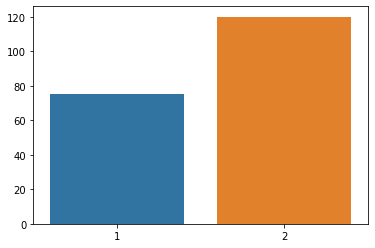

In [11]:
sns.barplot(x = [1, 2], y = score[:2])